
<p align = "center">
<img src= "https://img.freepik.com/free-vector/german-shorthaired-pointer-dog-hand-sketched-vector-drawing_139681-343.jpg?w=2000", width = "210" /> 
<img src= "https://media.istockphoto.com/vectors/paw-print-set-vector-id528565236?k=20&m=528565236&s=612x612&w=0&h=gSRYn7Af7S77kPOt4rfABWeIW1HJ2O87wdV62gVg8Co=", width = "400" /> 
<img src= "https://img.freepik.com/free-vector/domestic-cat-realistic-vector-sketch-illustration-sign-cat_231873-7108.jpg?w=2000" , width = "210"></p>



## <p align="center"> **Cats and dogs machine learning project**</p> 
***

Source of data: https://www.kaggle.com/competitions/dogs-vs-cats/data

<div class="alert alert-block alert-info"> All imports needed </div>

In [1]:
#All nessesary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import os

from imports_for_ML import load_images
import keras

In [2]:
%matplotlib inline

In [3]:
#!conda install scikit-learn -y

In [4]:
#!pip install scikit-learn

In [5]:
#!pip install tensorflow

In [6]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

### 1. Specifying path to data and checking if it works

In [7]:
img_dir = r'C:\Users\max\Desktop\train'
images = os.listdir(img_dir)
images[:3]

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg']

In [8]:
full_images = [os.path.join(img_dir, img) for img in images]

In [9]:
full_images

['C:\\Users\\max\\Desktop\\train\\cat.0.jpg',
 'C:\\Users\\max\\Desktop\\train\\cat.1.jpg',
 'C:\\Users\\max\\Desktop\\train\\cat.10.jpg',
 'C:\\Users\\max\\Desktop\\train\\cat.100.jpg',
 'C:\\Users\\max\\Desktop\\train\\cat.1000.jpg',
 'C:\\Users\\max\\Desktop\\train\\cat.10000.jpg',
 'C:\\Users\\max\\Desktop\\train\\cat.10001.jpg',
 'C:\\Users\\max\\Desktop\\train\\cat.10002.jpg',
 'C:\\Users\\max\\Desktop\\train\\cat.10003.jpg',
 'C:\\Users\\max\\Desktop\\train\\cat.10004.jpg',
 'C:\\Users\\max\\Desktop\\train\\cat.10005.jpg',
 'C:\\Users\\max\\Desktop\\train\\cat.10006.jpg',
 'C:\\Users\\max\\Desktop\\train\\cat.10007.jpg',
 'C:\\Users\\max\\Desktop\\train\\cat.10008.jpg',
 'C:\\Users\\max\\Desktop\\train\\cat.10009.jpg',
 'C:\\Users\\max\\Desktop\\train\\cat.1001.jpg',
 'C:\\Users\\max\\Desktop\\train\\cat.10010.jpg',
 'C:\\Users\\max\\Desktop\\train\\cat.10011.jpg',
 'C:\\Users\\max\\Desktop\\train\\cat.10012.jpg',
 'C:\\Users\\max\\Desktop\\train\\cat.10013.jpg',
 'C:\\Users\\ma

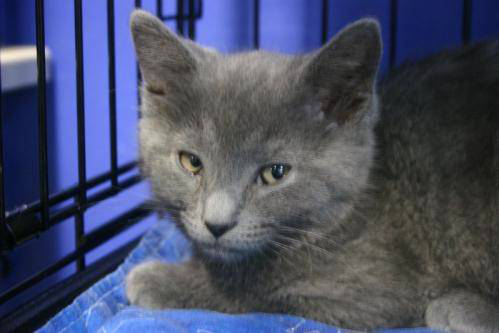

In [10]:
#test load

image_index = 2137
load_img(full_images[image_index])

### 2. Loading images  and splitting the data

In [11]:
X, y = load_images(img_dir, n_images=25000, resize=(50, 50))

**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
*******************************

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=23)

### 3. Building the model <br>
And additional imports

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [14]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, BatchNormalization
from keras.callbacks import ReduceLROnPlateau
import tensorflow

In [15]:
model = Sequential([

####
Conv2D(32,(5,5), activation = 'relu' ),
BatchNormalization(),
MaxPooling2D((2,2)),

###    
Conv2D(64,(3,3), activation = 'relu' ),
Conv2D(64,(3,3), activation = 'relu' ),
BatchNormalization(),
MaxPooling2D((2,2)),
Dropout(0.1),
    
####
Conv2D(128,(1,1), activation = 'relu' ),
Conv2D(128,(1,1), activation = 'relu' ),
Conv2D(128,(1,1), activation = 'relu' ),
BatchNormalization(),
MaxPooling2D((2,2)),
Dropout(0.7),
   
    
# Flattening all filters into one vector and adding 128 ordinary neurons
Flatten( input_shape = (5, 5,32)),
Dense(128, activation = 'relu'),

# Output neuron, dog (1), cat (0)
Dense(1, activation='sigmoid')
# Compiling, adam optimizer is used due to it being one of the most effective ones
])
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

### 4. Training

In [16]:
history = model.fit(X_train, y_train, 
                    validation_data = (X_test, y_test), 
                    epochs = 20, 
                    callbacks= [
                        tensorflow.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy',
                        patience=2,
                        verbose=1,
                        factor=0.5,
                        min_lr=0.00001)])

Epoch 1/20
704/704 [==============================] - 97s 133ms/step - loss: 0.7279 - accuracy: 0.5914 - val_loss: 0.6567 - val_accuracy: 0.6088 - lr: 0.0010
Epoch 2/20
704/704 [==============================] - 93s 132ms/step - loss: 0.6123 - accuracy: 0.6660 - val_loss: 0.6180 - val_accuracy: 0.6576 - lr: 0.0010
Epoch 3/20
704/704 [==============================] - 92s 130ms/step - loss: 0.5657 - accuracy: 0.7069 - val_loss: 0.8184 - val_accuracy: 0.5228 - lr: 0.0010
Epoch 4/20
703/704 [============================>.] - ETA: 0s - loss: 0.5264 - accuracy: 0.7391
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
704/704 [==============================] - 91s 130ms/step - loss: 0.5263 - accuracy: 0.7391 - val_loss: 0.7443 - val_accuracy: 0.5908 - lr: 0.0010
Epoch 5/20
704/704 [==============================] - 92s 131ms/step - loss: 0.4683 - accuracy: 0.7773 - val_loss: 1.3161 - val_accuracy: 0.5324 - lr: 5.0000e-04
Epoch 6/20
703/704 [=========================

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        2432      
                                                                 
 batch_normalization (BatchN  (None, 46, 46, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 19, 19, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 19, 19, 64)       2

In [18]:
keras.models.save_model(model = model, filepath = r'C:\Users\max\OneDrive - Akademia Leona Kozminskiego\uczelnia\SEMESTER 2\Intro to Python\final_project\catdogmodel_Branting', save_format = "h5")

### 5. Plotting the results

Accuracy on the training data:
704/704 [==============================] - 30s 43ms/step - loss: 0.1887 - accuracy: 0.9340
0.9339555501937866

Accuracy on the test data:
79/79 [==============================] - 19s 27ms/step - loss: 0.3583 - accuracy: 0.8384
0.8384000062942505


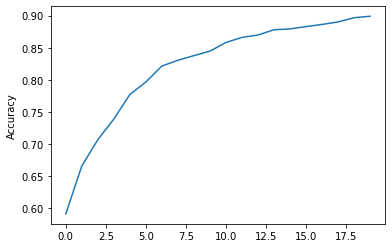

In [19]:
plt.plot(history.history['accuracy'])
plt.ylabel('Accuracy')

print('Accuracy on the training data:')
print(model.evaluate(X_train, y_train)[1])

print('\nAccuracy on the test data:')
print(model.evaluate(X_test, y_test)[1])

According to online results the accuracy is ok but not perfect. Usually good cats and dogs ML models yield between 80% and 85% accuracy.

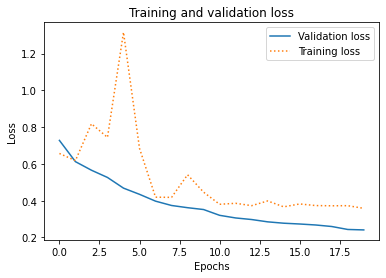

In [20]:
plt.plot(history.history['loss'], label = "Validation loss")
plt.plot(history.history['val_loss'], label = "Training loss", linestyle= ':')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and validation loss')
plt.legend()

The line doesnt resemble quite the perfect fit. It decreases over time by due to limitations of my computing power i cant increase epoch count. Higher number of epochs could make the fit better and lower the loss but it can also cause overtraining.

### 6. Checking results on pictures <br>
First 6 random correct and 6 random incorrect pictures

In [35]:
# defining a test sample to predict on 
test_sample = X_test[:75]
# predicting label with model
test_preds = model.predict(test_sample)
# defining a real label
test_real = y_test[:75]
# creating a mask for distinguishing correctly and incorrectly labels (comparing predicted ones to real ones)
true_false_preds = np.round(test_preds).astype(int).reshape(len(test_sample),)==test_real

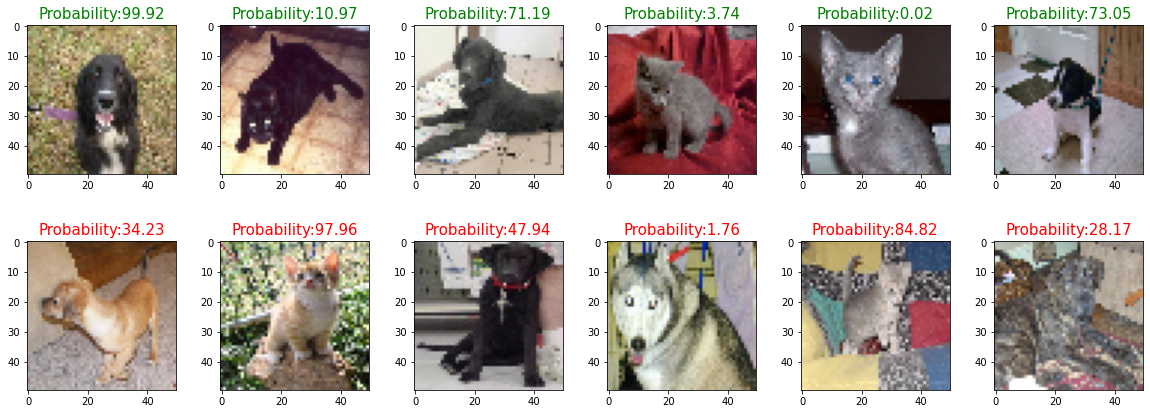

In [36]:
# creating fig
fig = plt.figure(figsize=(20,20))
# defining shape of plot
columns = 6
rows = 2
# creating two lists of indexes at which correct or incorrect labels are
correct_index = list(np.where(true_false_preds==True)[0])
incorrect_index = list(np.where(true_false_preds==False)[0])
# loop for each picture in the plot
for i in range(1, columns*rows+1):
    # first 6 loops are for correct images
    if i <=6:
        # choose a random index from correctly predicted ones
        index = np.random.choice(correct_index)
        # extracting probability for chosen index
        predicted_probability = test_preds[index, 0]
        # getting real label for index
        correct_label = test_real[index]
        # getting the image for index
        img = test_sample[index]
        
        # adding subplot
        fig.add_subplot(rows, columns, i)
        # plotting chosen picture
        plt.imshow(img/255)
        # adding title
        plt.title("Probability:{:.2f}".format(predicted_probability*100), fontsize=15, c='green')
        # deleting element at chosen index from correct_index list so the photo wont come up next time
        try:
            correct_index.pop(correct_index.index(index))
        except:
            continue
    # rest if the loop is for incorrectly predicted images
    else:
         # choose a random index from correctly predicted ones
        index = np.random.choice(incorrect_index)
        # extracting probability for chosen index
        predicted_probability = test_preds[index, 0]
        # getting real label for index
        correct_label = test_real[index]
        # getting the image for index
        img = test_sample[index]
        
        # adding subplot
        fig.add_subplot(rows, columns, i)
        # plotting chosen picture
        plt.imshow(img/255)
        # adding title
        plt.title("Probability:{:.2f}".format(predicted_probability*100), fontsize=15, c='red')
        # deleting element at chosen index from correct_index list so the photo wont come up next time
        try:
            incorrect_index.pop(incorrect_index.index(index))
        except:
            continue
        
plt.subplots_adjust(top= 0.65, bottom= 0.35, hspace= 0, wspace= 0.3)
plt.show()

Lastly checking model correctness on my dogs picture

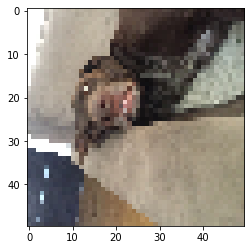

In [25]:
doggo = load_img(r'C:\Users\max\OneDrive - Akademia Leona Kozminskiego\uczelnia\SEMESTER 2\Intro to Python\final_project\piesio.jpg', target_size=(50,50))
plt.imshow(doggo)

In [26]:
doggo_array = img_to_array(doggo)
model.predict(doggo_array.reshape(1,50,50,3))

array([[0.93397844]], dtype=float32)

In [30]:
mods=model.predict(doggo_array.reshape(1,50,50,3))
print(mods)

[[0.93397844]]


The result is over 90% which is closer to 1. This means that it leans towards saying that in the picture it sees a dog.